In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Collection and Preprocessing

In [3]:
crop = pd.read_csv("Crop_recommendation.csv")

In [5]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [9]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
crop.shape

(2200, 8)

### Finding out the missing values

In [15]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### Finding out the duplicated values

In [17]:
crop.duplicated().sum()

0

In [19]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [23]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### Converting the categorical values into numerical values

In [25]:
crop_dict = {
    'rice':1,
    'maize':2,
    'chickpea':3,
    'kidneybeans':4,
    'pigeonpeas':5,
    'mothbeans':6,
    'mungbean':7,
    'blackgram':8,
    'lentil':9,
    'pomegranate':10,
    'banana':11,
    'mango':12,
    'grapes':13,
    'watermelon':14,
    'muskmelon':15,
    'apple':16,
    'orange':17,
    'papaya':18,
    'coconut':19,
    'cotton':20,
    'jute':21,
    'coffee':22
}

In [27]:
crop['label'] = crop['label'].replace(crop_dict)

In [29]:
crop['label'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

### Splitting the data into X and y 

In [31]:
X = crop[['N','P','K','temperature','humidity','ph','rainfall']]
y = crop['label']

In [33]:
print("The X parameters are:\n",X)
print("The y parameter is:\n",y)

The X parameters are:
         N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]
The y parameter is:
 0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: label, Length: 2200, dtype: int64


# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=48)

### Perform feature scaling as it ensure that all numerical features are on the same scale

In [41]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.fit_transform(X_test)

### Importing SVM and RandomForestClassifier for training and comparison between two models performance

In [51]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [53]:
svm = SVC()
rf = RandomForestClassifier()

In [61]:
svm.fit(X_train_scaled,y_train)

SVC()

In [63]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

# Model Evalutaion

#### Importing necessary libraries for evaluating model performance

In [65]:
y_pred_svm = svm.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

In [67]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [69]:
accu_svm = accuracy_score(y_test,y_pred_svm)
accu_rf = accuracy_score(y_test,y_pred_rf)

In [71]:
print("The accuracy score for SVM is:",accu_svm)
print("The accuracy score for RandomForestClassifier is :",accu_rf)

The accuracy score for SVM is: 0.9848484848484849
The accuracy score for RandomForestClassifier is : 0.990909090909091


# Visualizing the models

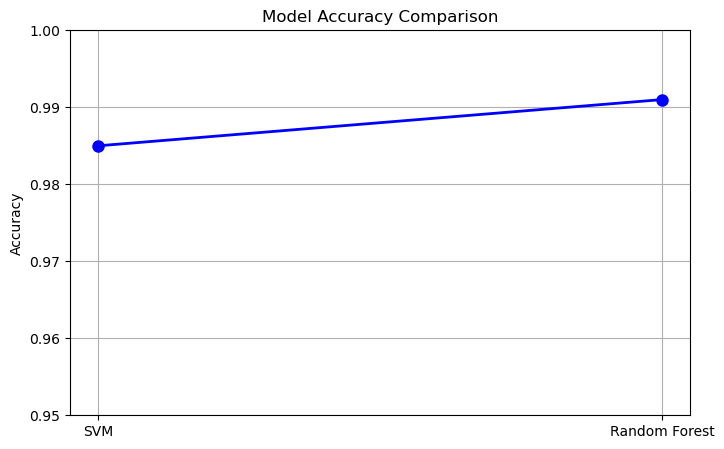

In [77]:
models = ['SVM','Random Forest']
score = [0.985,0.991]
plt.figure(figsize=(8,5))
plt.plot(models,score,marker='o',linestyle='-',color='blue',linewidth=2,markersize=8)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0.95,1.01,0.01))
plt.grid()
plt.ylim(0.95,1)
plt.show()

### Confusion matrix

In [79]:
cm = confusion_matrix(y_test,y_pred_rf)

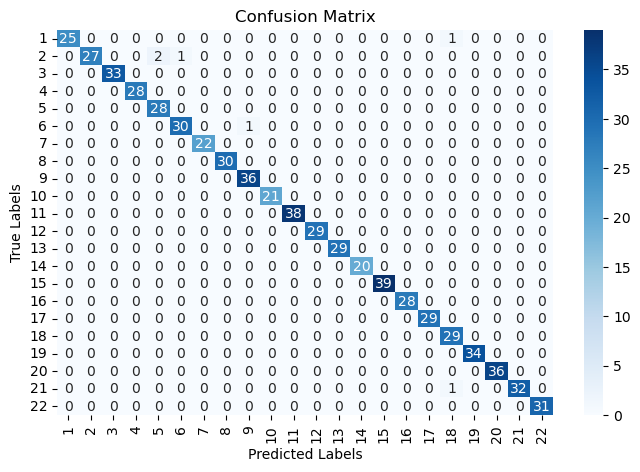

In [85]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=rf.classes_,yticklabels=rf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [91]:
print(classification_report(y_test,y_pred_rf,target_names=list(crop_dict.keys())))

              precision    recall  f1-score   support

        rice       1.00      0.96      0.98        26
       maize       1.00      0.90      0.95        30
    chickpea       1.00      1.00      1.00        33
 kidneybeans       1.00      1.00      1.00        28
  pigeonpeas       0.93      1.00      0.97        28
   mothbeans       0.97      0.97      0.97        31
    mungbean       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        30
      lentil       0.97      1.00      0.99        36
 pomegranate       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        38
       mango       1.00      1.00      1.00        29
      grapes       1.00      1.00      1.00        29
  watermelon       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        39
       apple       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        29
      papaya       0.94    

In [97]:
reverse_crop_dict = {v:k for k,v in crop_dict.items()}

# Testing the model

In [107]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    features_scaled = scaled.transform(features)
    prediction = rf.predict(features_scaled)[0]
    crop_name = reverse_crop_dict[prediction]
    return crop_name

In [109]:
result = recommendation(90,42,43,26.5,80.2,6.7,205)
print("Recommended crop:",result)

Recommended crop: rice


In [111]:
print("Recommended Crop:", recommendation(100, 40, 50, 27.5, 78.9, 6.5, 190))
print("Recommended Crop:", recommendation(20, 10, 12, 24.0, 60.2, 5.8, 100))

Recommended Crop: jute
Recommended Crop: orange


# Saving the model and scaler model

In [113]:
import pickle

In [115]:
with open('crop_model.pkl','wb')as f:
    pickle.dump(rf,f)
with open('scaler.pkl','wb')as f:
    pickle.dump(scaled,f)